Stochastic Gradient Descent (`SGD`)

In [47]:
import torch
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits import mplot3d

In [48]:
# The class for plot the diagram

class plot_error_surfaces(object):
    
    # Constructor
    def __init__(self, w_range, b_range, X, Y, n_samples = 30, go = True):
        W = np.linspace(-w_range, w_range, n_samples)
        B = np.linspace(-b_range, b_range, n_samples)
        w, b = np.meshgrid(W, B)    
        Z = np.zeros((30, 30))
        count1 = 0
        self.y = Y.numpy()
        self.x = X.numpy()
        for w1, b1 in zip(w, b):
            count2 = 0
            for w2, b2 in zip(w1, b1):
                Z[count1, count2] = np.mean((self.y - w2 * self.x + b2) ** 2)
                count2 += 1
            count1 += 1
        self.Z = Z
        self.w = w
        self.b = b
        self.W = []
        self.B = []
        self.LOSS = []
        self.n = 0
        if go == True:
            plt.figure()
            plt.figure(figsize = (7.5, 5))
            plt.axes(projection = '3d').plot_surface(self.w, self.b, self.Z, rstride = 1, cstride = 1,cmap = 'viridis', edgecolor = 'none')
            plt.title('Loss Surface')
            plt.xlabel('w')
            plt.ylabel('b')
            plt.show()
            plt.figure()
            plt.title('Loss Surface Contour')
            plt.xlabel('w')
            plt.ylabel('b')
            plt.contour(self.w, self.b, self.Z)
            plt.show()
    
    # Setter
    def set_para_loss(self, W, B, loss):
        self.n = self.n + 1
        self.W.append(W)
        self.B.append(B)
        self.LOSS.append(loss)
    
    # Plot diagram
    def final_plot(self): 
        ax = plt.axes(projection = '3d')
        ax.plot_wireframe(self.w, self.b, self.Z)
        ax.scatter(self.W, self.B, self.LOSS, c = 'r', marker = 'x', s = 200, alpha = 1)
        plt.figure()
        plt.contour(self.w, self.b, self.Z)
        plt.scatter(self.W, self.B, c = 'r', marker = 'x')
        plt.xlabel('w')
        plt.ylabel('b')
        plt.show()
    
    # Plot diagram
    def plot_ps(self):
        plt.subplot(121)
        plt.ylim
        plt.plot(self.x, self.y, 'ro', label = "training points")
        plt.plot(self.x, self.W[-1] * self.x + self.B[-1], label = "estimated line")
        plt.xlabel('x')
        plt.ylabel('y')
        plt.ylim((-10, 15))
        plt.title('Data Space Iteration: ' + str(self.n))
        plt.subplot(122)
        plt.contour(self.w, self.b, self.Z)
        plt.scatter(self.W, self.B, c = 'r', marker = 'x')
        plt.title('Loss Surface Contour Iteration' + str(self.n))
        plt.xlabel('w')
        plt.ylabel('b')
        plt.show()

`Dataset`

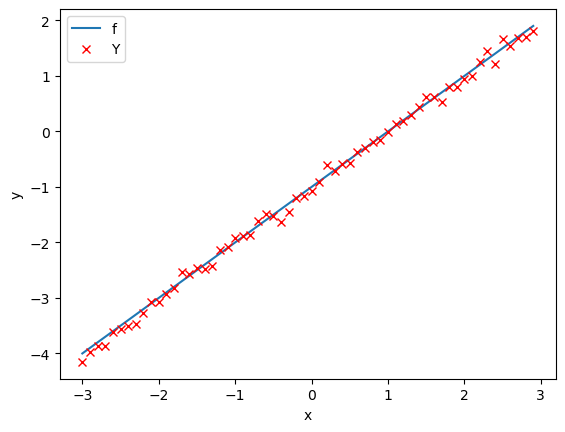

In [49]:
torch.manual_seed(1) #set random seed

# setup the actual data
X = torch.arange(-3,3,0.1).view(-1,1)
f = 1*X-1
Y = f+0.1*torch.randn(X.size())

# plot the dataset
plt.plot(X,f,label = 'f')
plt.plot(X,Y,'rx',label = 'Y')
plt.legend()
plt.xlabel('x')
plt.ylabel('y')
plt.show()


`Make the model`

In [50]:
# forward function

def forward(x):
    return w*x+b

`Cost Function`

In [51]:
# Mean Squar Error Loss function

def criterion(Y,Yhat):
    return torch.mean((Yhat-Y)**2)

`Train the model: Batch Gradient Descent`

In [52]:
# define parameter w and b

w = torch.tensor(-15.0, requires_grad = True)  # we put require_gra, True as we want to have a learnable w
b = torch.tensor(-10.0, requires_grad = True)

In [53]:
# Define the learning rate and empty list for each iteration

lr = 0.1
LOSS_BGD = []

<Figure size 640x480 with 0 Axes>

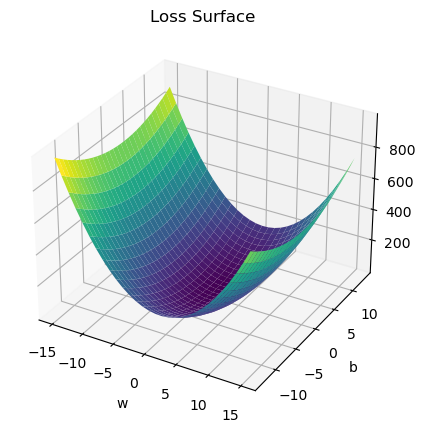

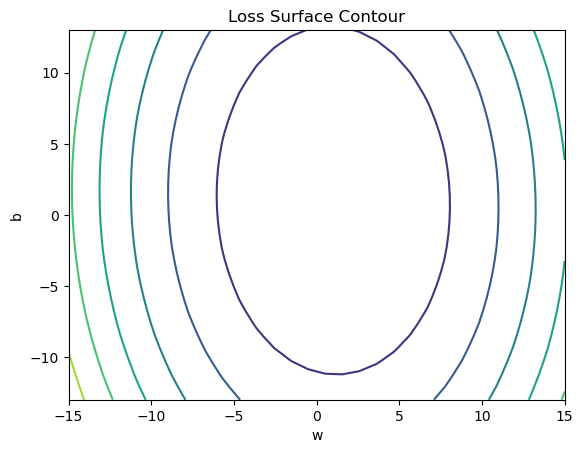

In [54]:
# Create plot_error_surfaces for viewing the data

get_surface = plot_error_surfaces(15, 13, X, Y, 30)

In [55]:
def train_model(iter):
    for epoch in range(iter):

        # prediction
        Yhat = forward(X)

        # calculate the loss
        loss = criterion(Yhat,Y)

        # plotting
        get_surface.set_para_loss(w.data.tolist(), b.data.tolist(), loss.tolist())
        get_surface.plot_ps()

        # store data inside empty list
        LOSS_BGD.append(loss.detach().numpy())

        # backward : compute gradient with respect to all learnable parameters
        loss.backward()

        # update parameters
        w.data = w.data - lr*w.grad.data
        b.data = b.data - lr*b.grad.data

        # zero the gradient before the next backward pass
        w.grad.data.zero_()
        b.grad.data.zero_()       

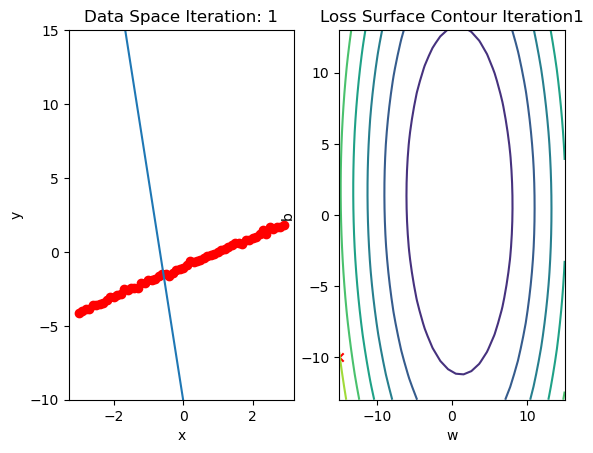

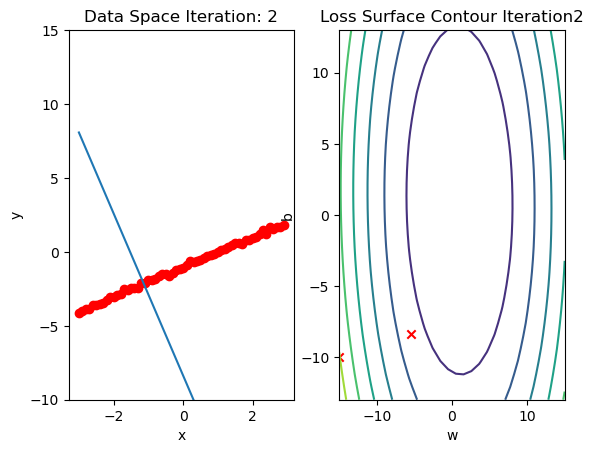

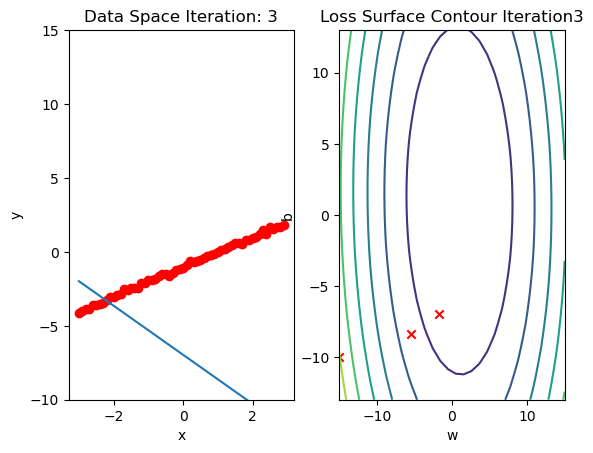

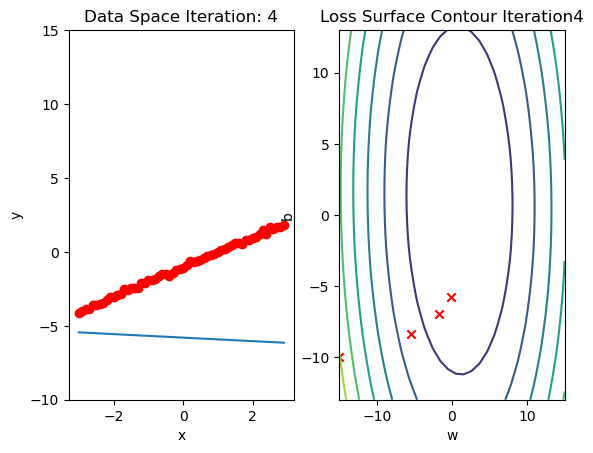

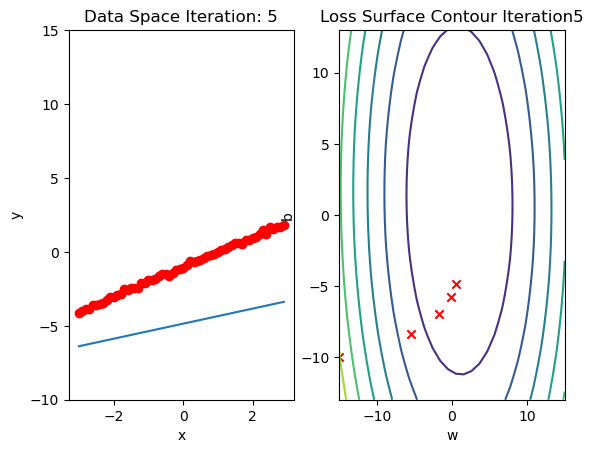

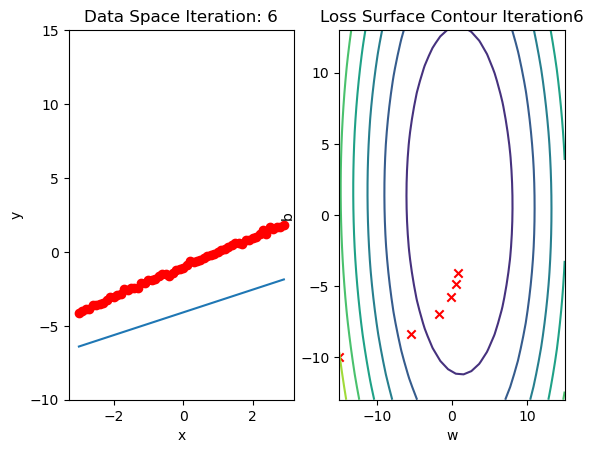

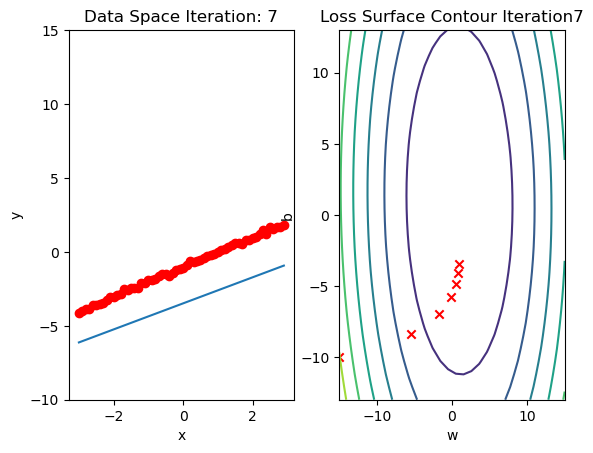

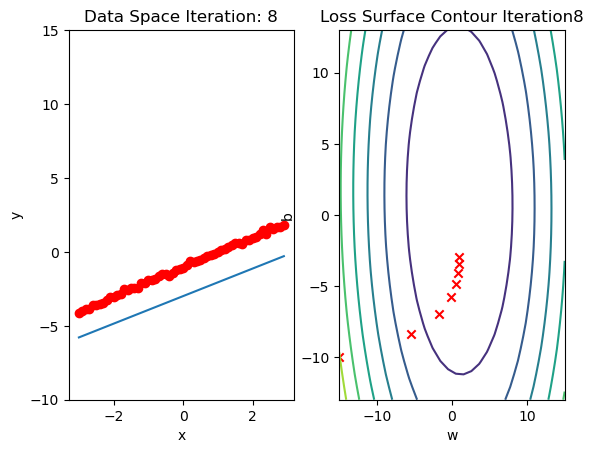

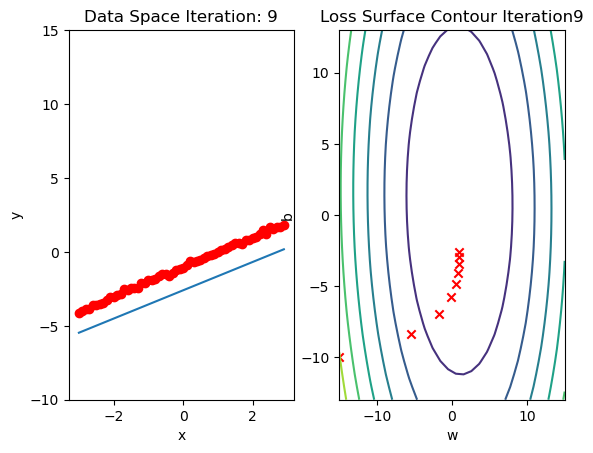

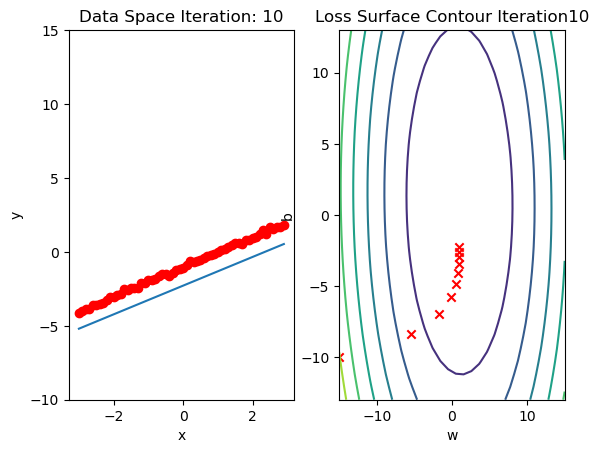

In [56]:
train_model(10)

`Train the model: Stochastic Gradient Descent`

In the Stochastic Gradient descent we try to minimize the cost for each feature at a time and in this way we try to achieve an optimize form of the weight and bias

In [57]:
# Create plot_error_surfaces for viewing the data

get_surface = plot_error_surfaces(15, 13, X, Y, 30, go = False)

# The function  for training the model

LOSS_SGD = []
w = torch.tensor(-15.0, requires_grad = True)
b = torch.tensor(-10.0, requires_grad = True)

def train_model_SGD(iter):

    lr = 0.1
    for epoch in range(iter):

        Yhat = forward(X)
        LOSS_SGD.append(criterion(Yhat,Y).tolist())

        for x, y in zip(X,Y):
            yhat = forward(x)
            loss = criterion(yhat,y)
            get_surface.set_para_loss(w.data.tolist(), b.data.tolist(), loss.tolist())
            loss.backward()
            w.data = w.data-lr*w.grad.data
            b.data = b.data-lr*b.grad.data
            w.grad.data.zero_()
            b.grad.data.zero_()

        get_surface.plot_ps()



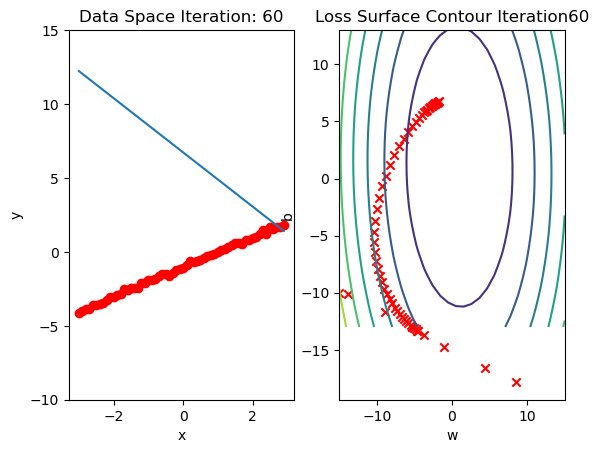

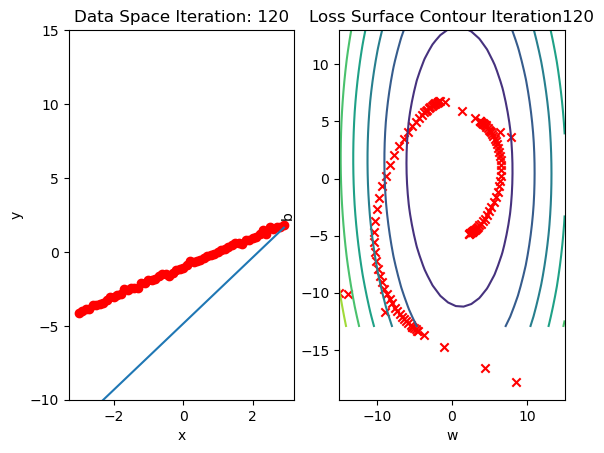

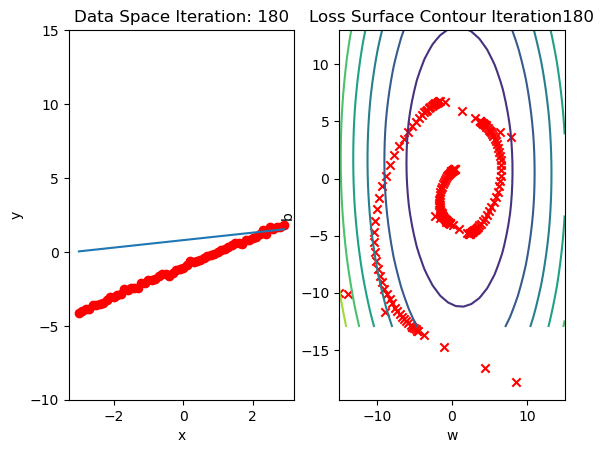

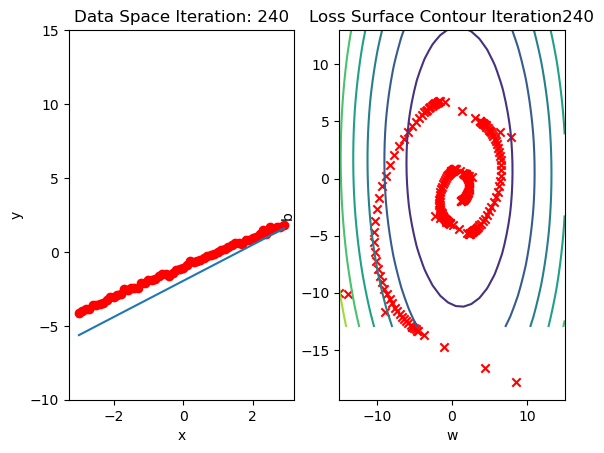

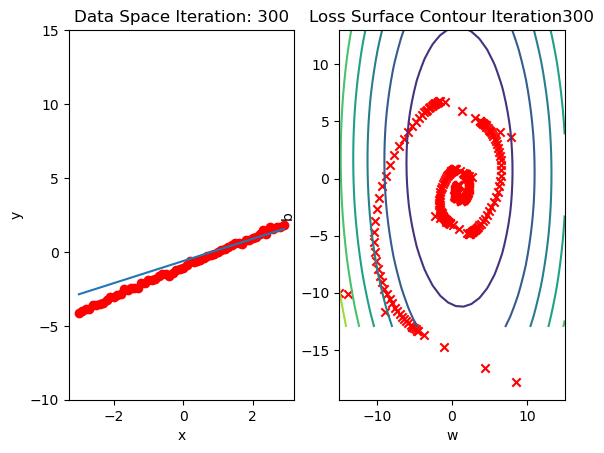

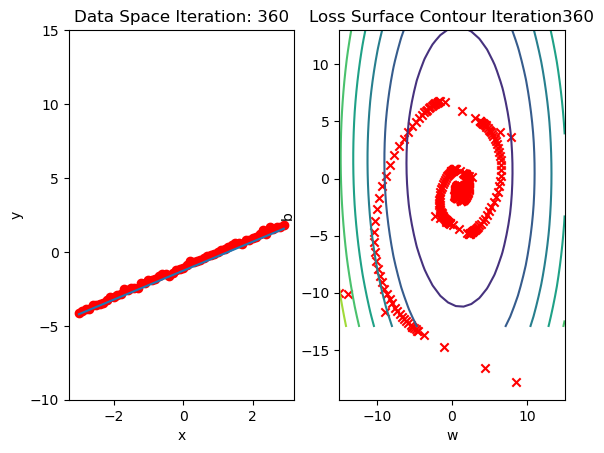

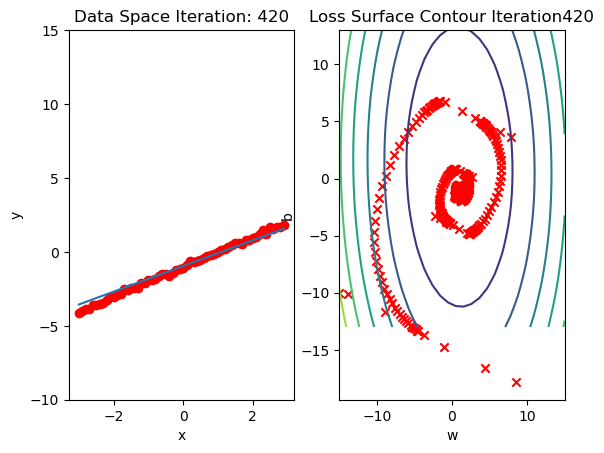

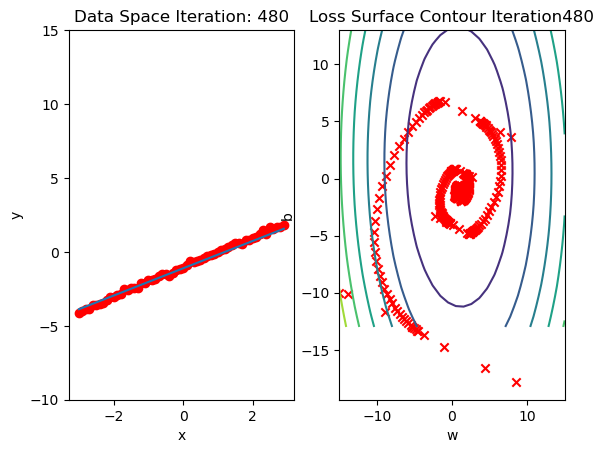

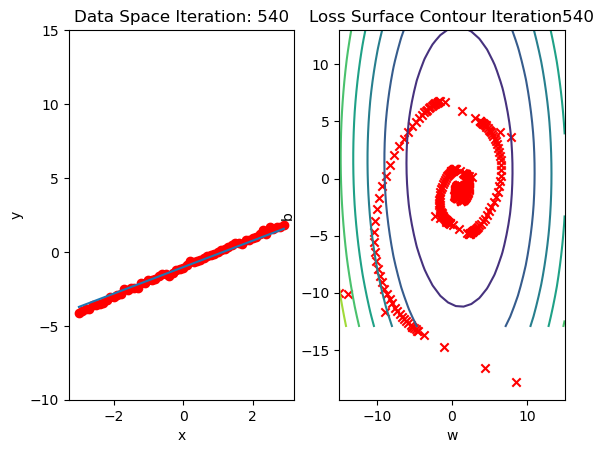

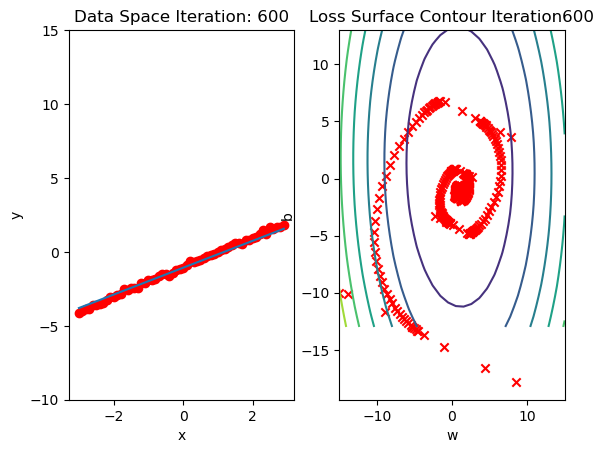

In [58]:
train_model_SGD(10)

Here we can compare the results of the BGD and SGD. As we can see here SGD work better than BGD in low itetration, while after many iteration they have  same solotion

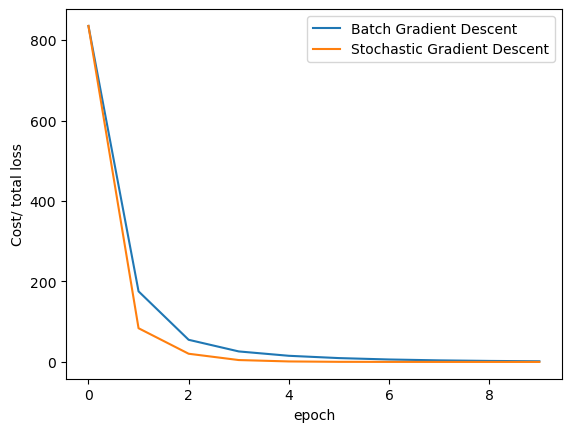

In [59]:
plt.plot(LOSS_BGD, label = 'Batch Gradient Descent')
plt.plot(LOSS_SGD, label = 'Stochastic Gradient Descent')
plt.xlabel('epoch')
plt.ylabel('Cost/ total loss')
plt.legend()
plt.show()

`Train the model: Stochastic Gradient Descent with data loader`

Here in SGD insted of loading data from a tensor we want to load data from dataloader

In [60]:
# import modul for building a dataset class

from torch.utils.data import Dataset, DataLoader

# Create class

class Data(Dataset):

    # Construcctor
    def __init__(self):
        self.x = torch.arange(-3,3,0.1).view(-1,1)
        self.y = 1 * self.x - 1
        self.len = self.x.shape[0]


    # Getter
    def __getitem__(self,index):
        return self.x[index], self.y[index]
    
    # Return he length
    def __len__(self):
        return self.len
    

In [61]:
dataset = Data()

trainloader = DataLoader(dataset = dataset, batch_size = 1) # this batch size represent that for example if we have 10 elements in our data set we load them one by one

In [62]:
get_surface = plot_error_surfaces(15, 13, X, Y, 30, go = False)

LOSS_SGD_loader = []
w = torch.tensor(-15.0, requires_grad = True)
b = torch.tensor(-10.0, requires_grad = True)

def train_model_SGD_dataloader(iter):

    lr = 0.1
    for epoch in range(iter):

        Yhat = forward(X)
        LOSS_SGD_loader.append(criterion(Yhat,Y).tolist())

        for x, y in trainloader:
            yhat = forward(x)
            loss = criterion(yhat,y)
            get_surface.set_para_loss(w.data.tolist(), b.data.tolist(), loss.tolist())
            loss.backward()
            w.data = w.data-lr*w.grad.data
            b.data = b.data-lr*b.grad.data
            w.grad.data.zero_()
            b.grad.data.zero_()

        get_surface.plot_ps()

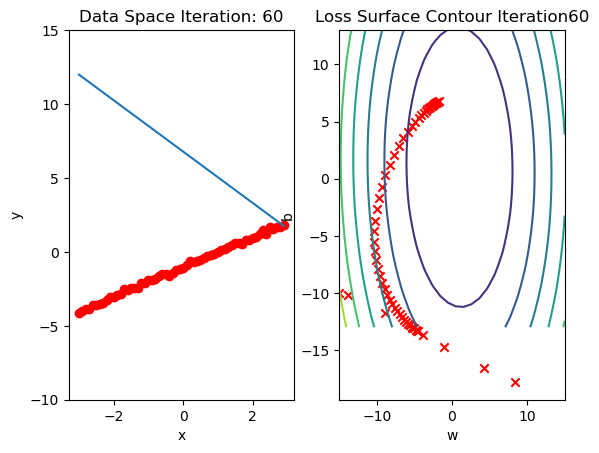

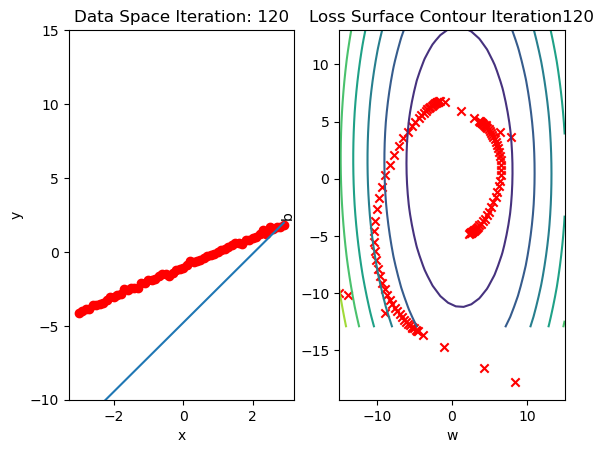

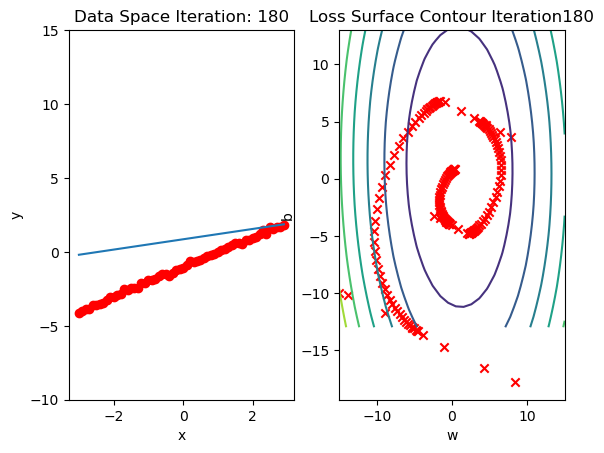

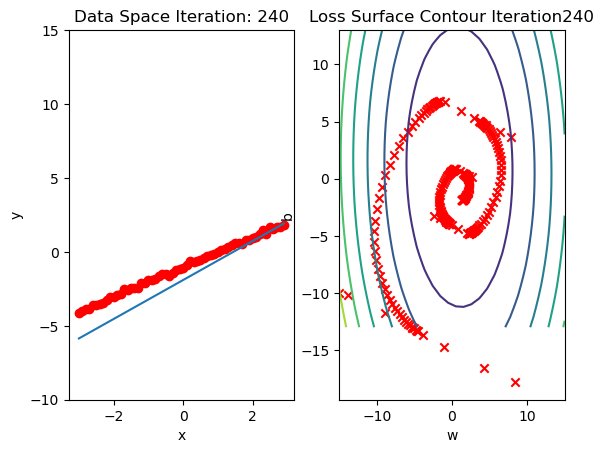

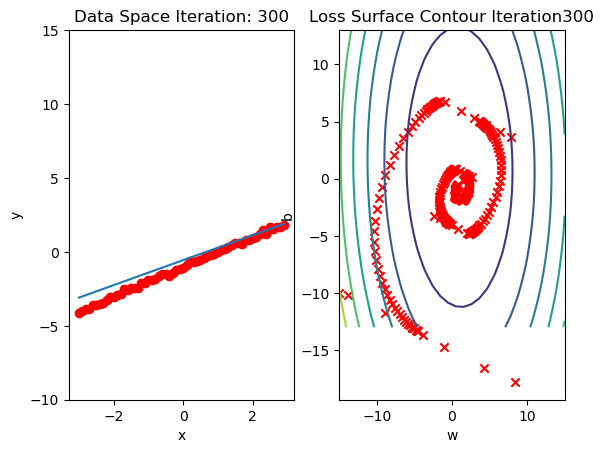

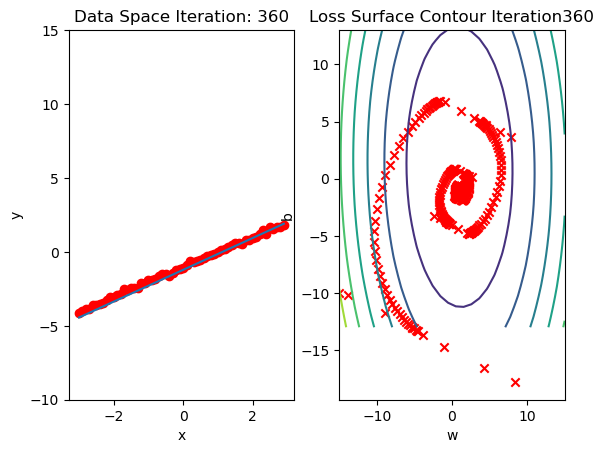

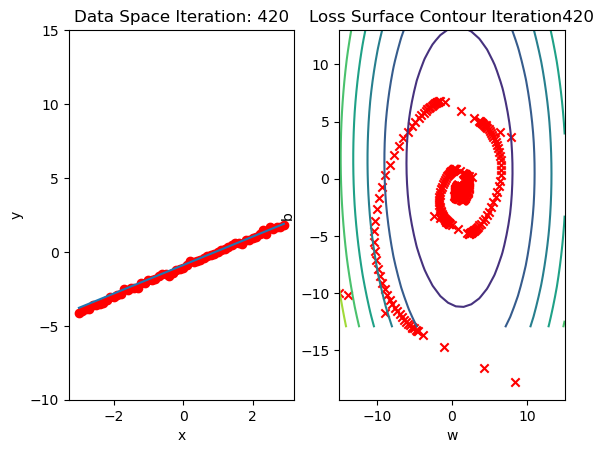

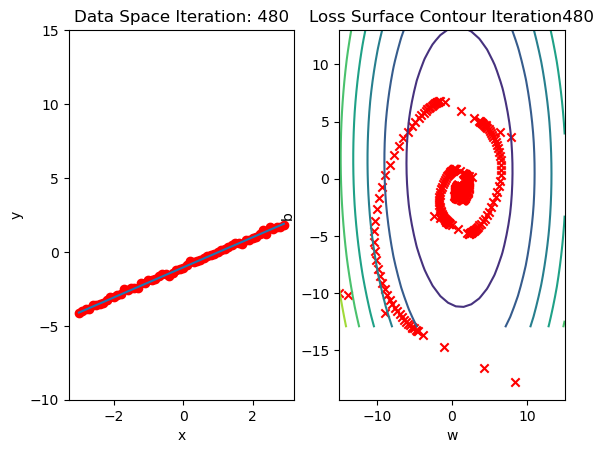

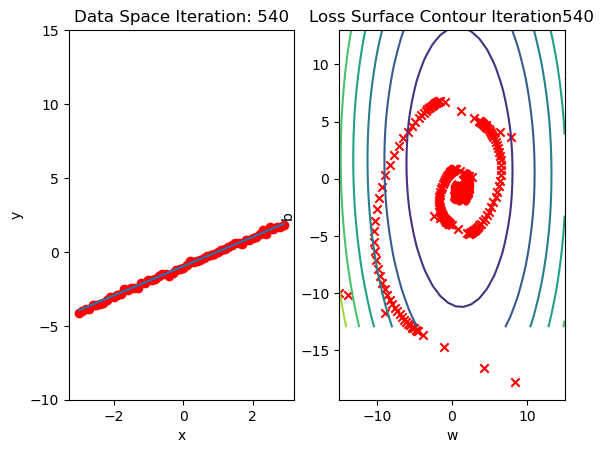

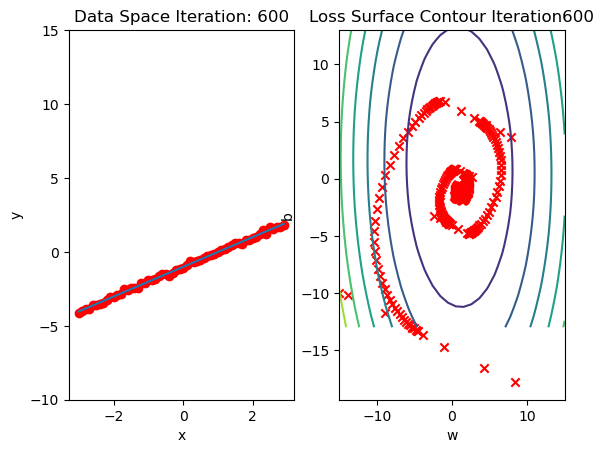

In [63]:
train_model_SGD_dataloader(10)

`Train the model: Mini Batch Gradient Descent with Batch size equals 5`  
What is batch size 5 ?   
It means that when we have for example 20 samples in our dataset we have to devide this dataset to 5 and we have 4 batches that we have to evaluate them in each iteration. 

In [64]:
dataset = Data()
trainloader_batch_5 = DataLoader(dataset = dataset, batch_size = 5)# <<== the number of batch size

In [65]:
get_surface = plot_error_surfaces(15, 13, X, Y, 30, go = False)

In [66]:
# Define train_model_Mini5 function

w = torch.tensor(-15.0, requires_grad = True)
b = torch.tensor(-10.0, requires_grad = True)
LOSS_MINI5 = []
lr = 0.1

def train_model_Mini5(epochs):
    for epoch in range(epochs):
        Yhat = forward(X)
        get_surface.set_para_loss(w.data.tolist(), b.data.tolist(), criterion(Yhat, Y).tolist())
        get_surface.plot_ps()
        LOSS_MINI5.append(criterion(Yhat, Y).tolist())
        for x, y in trainloader:
            yhat = forward(x)
            loss = criterion(yhat, y)
            get_surface.set_para_loss(w.data.tolist(), b.data.tolist(), loss.tolist())
            loss.backward()
            w.data = w.data - lr * w.grad.data
            b.data = b.data - lr * b.grad.data
            w.grad.data.zero_()
            b.grad.data.zero_()

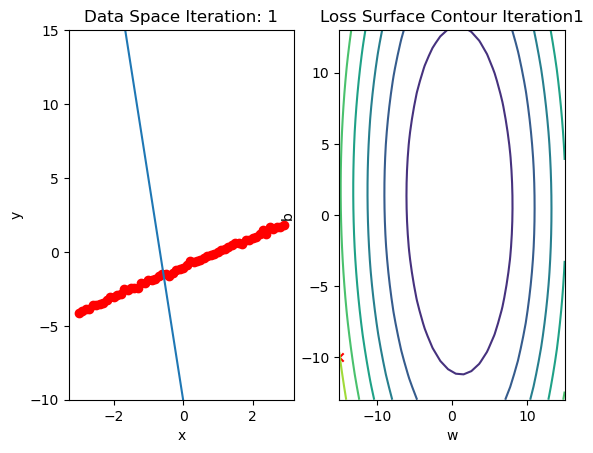

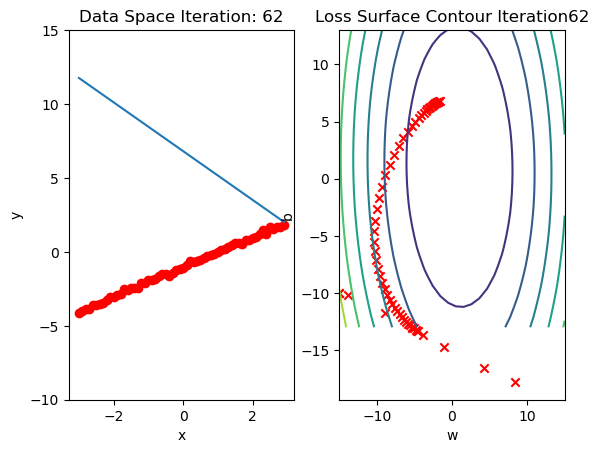

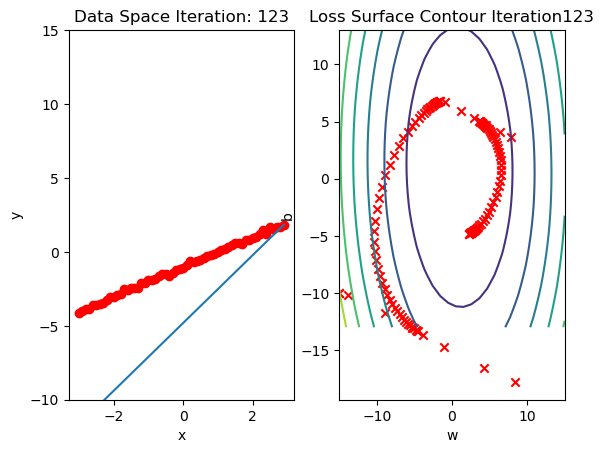

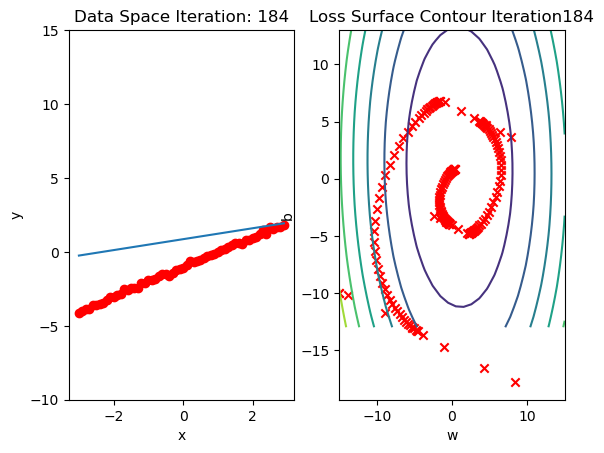

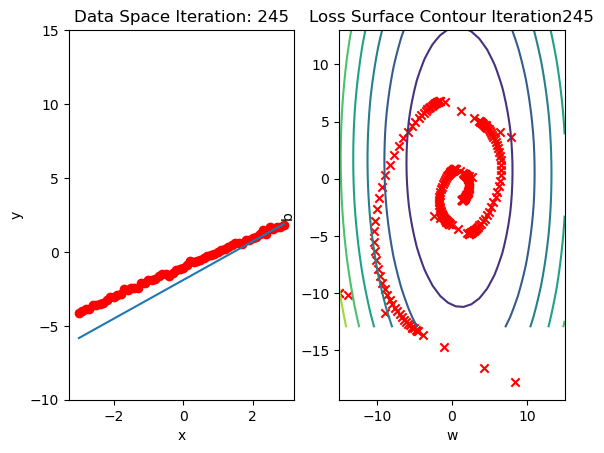

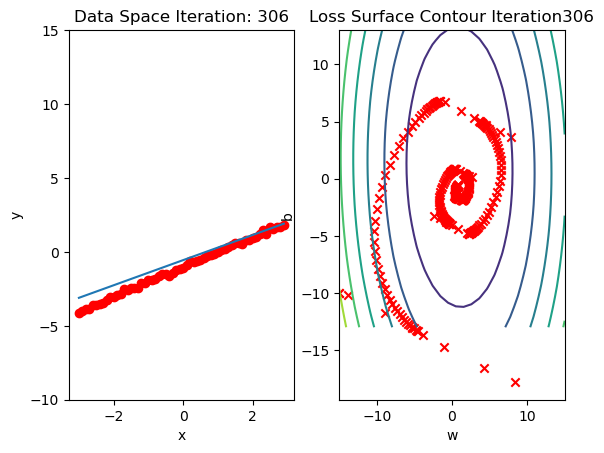

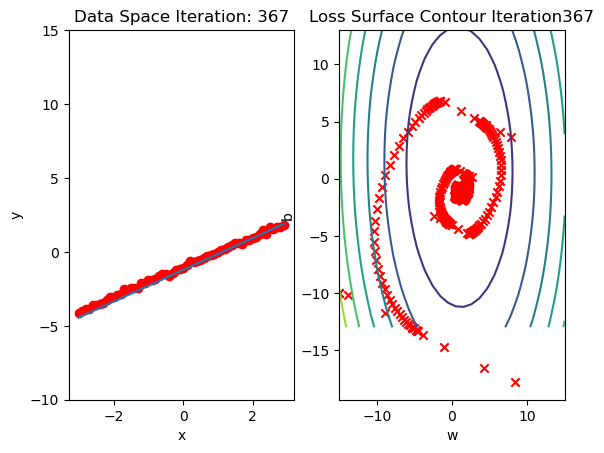

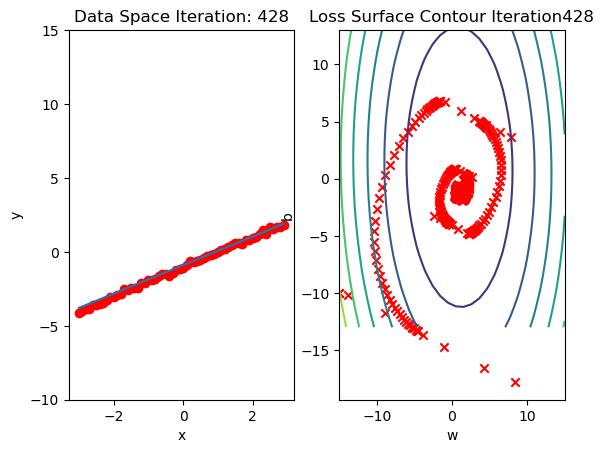

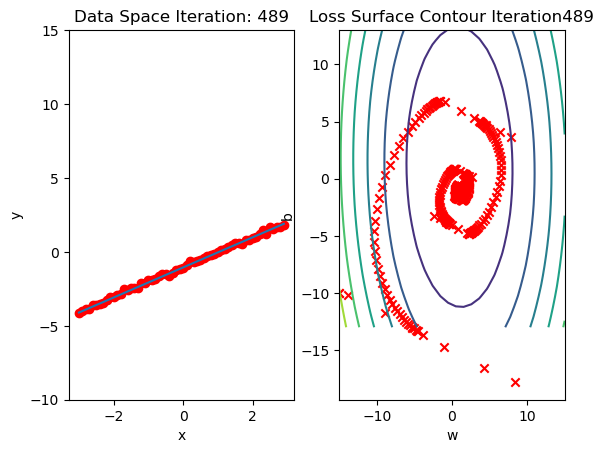

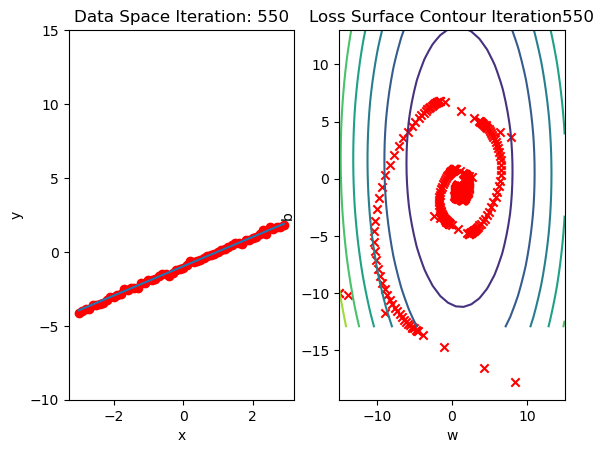

In [67]:
train_model_Mini5(10)

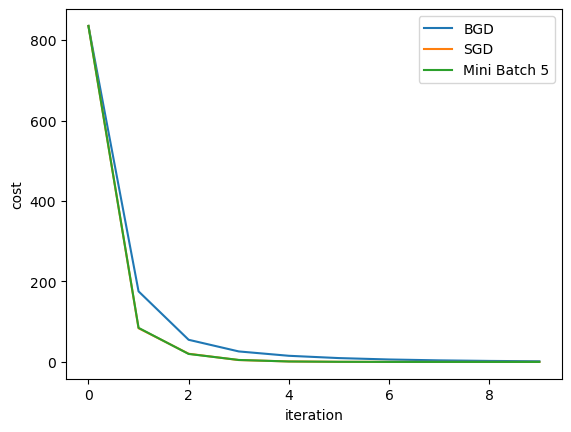

In [68]:
plt.plot(LOSS_BGD, label = 'BGD')
plt.plot(LOSS_SGD, label = 'SGD')
plt.plot(LOSS_MINI5, label = 'Mini Batch 5')
plt.legend()
plt.xlabel('iteration')
plt.ylabel('cost')
plt.show()

`optimizer in Pytorch`

In [69]:
import torch
from torch.utils.data import Dataset, DataLoader
torch.manual_seed(1) # it means that here we are using the same seed value and the same sequence of random numbers every time we run your code.

In [70]:
# create dataset

class Data(Dataset):

    # Constructor
    def __init__(self):
        # Generate values from -3 to 3
        self.x = torch.arange(-3,3,0.1).view(-1,1)
        # Create a line with slope of 1 and a bias of -1
        self.f = 1*self.x - 1
        # add some noise
        self.y = self.f + 0.1*torch.randn(self.x.size())
        self.len = self.x.shape[0]

    # Getter
    def __getitem__(self,index):
        return self.x[index],self.y[index]
    
    # Get Length
    def __len__(self):
        return self.len

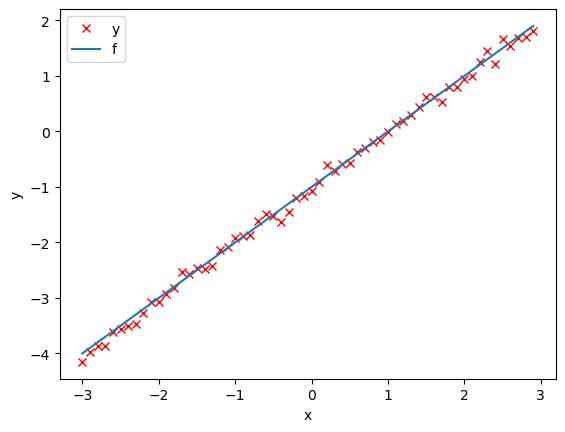

In [71]:
# Create dataset object

dataset = Data()

# Plot the data

plt.plot(dataset.x, dataset.y,'rx', label='y')
plt.plot(dataset.x, dataset.f,label = 'f')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()

Now here we want to make linear regression model

In [72]:
from torch import nn, optim

class linear_regression(nn.Module):

    # Constructor
    def __init__(self, input_size, output_size):
        super(linear_regression,self).__init__()
        self.linear = nn.Linear(input_size,output_size)

    # Prediction
    def forward(self, x):
        yhat = self.linear(x)
        return yhat

In [73]:
# Cost Function

criterion = nn.MSELoss() # this is the mean square error loss function that is quite common in the regression

# Create a linear regression object and optimizer object.
# the optimizer object will use the linear regression object.

model = linear_regression(1,1)
optimizer = optim.SGD(model.parameters(), lr = 0.01)

In [74]:
list(model.parameters())

[Parameter containing:
 tensor([[0.3636]], requires_grad=True),
 Parameter containing:
 tensor([0.4957], requires_grad=True)]

In [75]:
# create data loader object

trainloader = DataLoader(dataset = dataset, batch_size = 1)

In [76]:
# Customize the weight and bias

model.state_dict()['linear.weight'][0] = -15
model.state_dict()['linear.bias'][0] = -10

In [77]:
# Create plot surface object

get_surface = plot_error_surfaces(15, 13, dataset.x, dataset.y, 30, go = False)

In [94]:
# Train Model

def train_model_BGD(iter):
    for epoch in range(iter):
        for x,y in trainloader:
            yhat = model(x)
            loss = criterion(yhat, y)
            get_surface.set_para_loss(model, loss.tolist())
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
        get_surface.plot_ps()


In [95]:
train_model_BGD(5)

TypeError: plot_error_surfaces.set_para_loss() missing 1 required positional argument: 'loss'